In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sb
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('US_MaizeYield Predictors_1950-2013.csv')

In [3]:
df.index = pd.to_datetime(df.year, format='%Y')
df['state'] = df['state'].astype(int)
df_states =  pd.read_csv('states.csv', header=0, 
                         names=['name', 'zip', 'FIPS'])
st_dict = { int(row['FIPS']): row['zip'] for index, row in df_states.iterrows()}
df['state'] = df['state'].map(st_dict)

In [4]:
!pip install geopandas
import geopandas as gpd
import folium

In [5]:
# We import the geoJSON file. 
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
# We read the file and print it.
geoJSON_df = gpd.read_file(state_geo)
geoJSON_df = geoJSON_df.rename(columns = {"id":"state"})
geoJSON_df.head()

,state,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [6]:
final_df = geoJSON_df.merge(df, on ="state")
final_df.head(2)

,state,name,geometry,yield,year,fips,area,EDD_4,GDD_4,prcp_4,SM_mean_4,SM_week_max_4,SM_week_min_4,SM_mean2_4,prcp2_4,EDD_5,GDD_5,prcp_5,SM_mean_5,SM_week_max_5,SM_week_min_5,SM_mean2_5,prcp2_5,EDD_6,GDD_6,prcp_6,SM_mean_6,SM_week_max_6,SM_week_min_6,SM_mean2_6,prcp2_6,EDD_7,GDD_7,prcp_7,SM_mean_7,SM_week_max_7,SM_week_min_7,SM_mean2_7,prcp2_7,EDD_8,GDD_8,prcp_8,SM_mean_8,SM_week_max_8,SM_week_min_8,SM_mean2_8,prcp2_8,EDD_9,GDD_9,prcp_9,SM_mean_9,SM_week_max_9,SM_week_min_9,SM_mean2_9,prcp2_9,maize_irr_frac
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",182.2,2013.0,1033,25500.0,0.144660,182.989896,138.405888,30.587954,31.415827,30.061306,941.999898,19333.677294,2.140415,307.845005,129.992978,29.244037,31.925165,27.977068,860.303639,16966.031939,15.901134,438.528011,102.425542,28.345804,30.798655,24.423257,809.207257,10500.088267,11.920542,456.185492,183.840496,29.832954,31.353337,28.232217,898.043844,35385.660239,16.034756,457.816776,126.349092,28.992069,32.38172,27.690612,848.933193,16804.874644,12.602523,388.188638,96.585943,27.869618,29.376769,25.102011,781.745164,9666.466330,0.119278
1,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",102.4,2012.0,1033,24500.0,0.444557,226.509776,39.489620,26.918694,30.273795,24.639479,730.920612,1613.068087,10.229904,381.640335,102.801898,28.099729,31.726761,24.807535,798.927471,10854.030094,29.706318,407.929159,41.418904,25.227545,29.856153,22.629193,643.269072,1787.107896,55.149480,506.288732,150.818249,26.525931,33.543850,18.522075,710.889904,22994.199726,23.369527,462.770254,79.330313,27.629490,30.41856,26.194190,769.387472,6367.565199,6.820552,355.923101,152.952440,28.802978,30.817406,25.627490,834.572860,23509.203313,0.119278


In [7]:
ill_df = final_df.where(final_df['state'] == 'IL').dropna()
ill_df.index = pd.to_datetime(ill_df.year, format='%Y')

ill_df['total_prcp'] = ill_df['prcp_4'] + ill_df['prcp_5'] + ill_df['prcp_6'] + ill_df['prcp_7'] + ill_df['prcp_8'] + ill_df['prcp_9']

In [8]:
final_df['total_prcp'] = final_df['prcp_4'] + final_df['prcp_5'] + final_df['prcp_6'] + final_df['prcp_7'] + final_df['prcp_8'] + final_df['prcp_9']

In [9]:
final_df.index = pd.to_datetime(final_df.year, format='%Y')
states_df = final_df.groupby(['state'])

AL
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     4112.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:36   Log-Likelihood:                -15469.
No. Observations:                3649   AIC:                         3.094e+04
Df Residuals:                    3646   BIC:                         3.096e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2710.4016     31.702    -85.496      

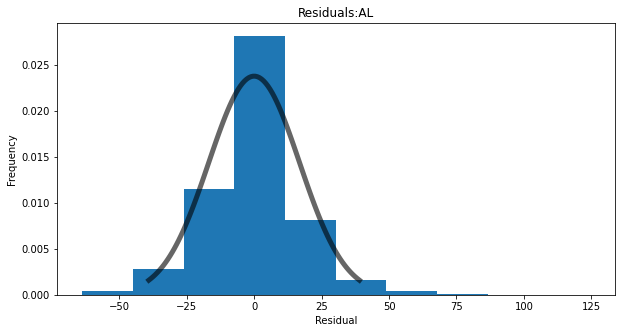

AR
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     6099.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:37   Log-Likelihood:                -9591.6
No. Observations:                2212   AIC:                         1.919e+04
Df Residuals:                    2209   BIC:                         1.921e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5587.9364     51.930   -107.605      

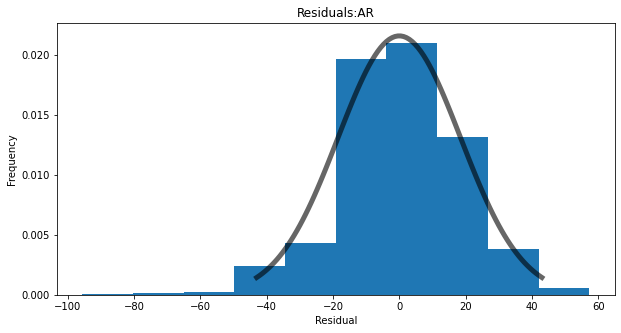

AZ
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     354.1
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           2.51e-76
Time:                        19:36:37   Log-Likelihood:                -1326.1
No. Observations:                 274   AIC:                             2658.
Df Residuals:                     271   BIC:                             2669.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8242.7562    314.241    -26.231      

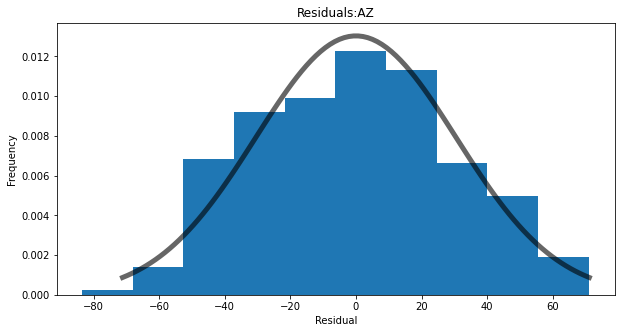

CA
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     2651.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:38   Log-Likelihood:                -5593.3
No. Observations:                1276   AIC:                         1.119e+04
Df Residuals:                    1273   BIC:                         1.121e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5042.2386     71.043    -70.975      

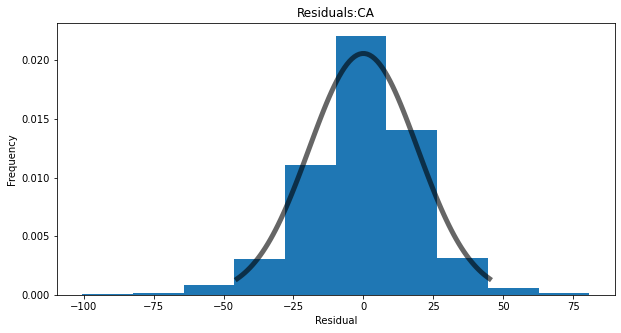

CO
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     358.3
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.75e-123
Time:                        19:36:38   Log-Likelihood:                -5924.5
No. Observations:                1240   AIC:                         1.185e+04
Df Residuals:                    1237   BIC:                         1.187e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2954.7669    115.062    -25.680      

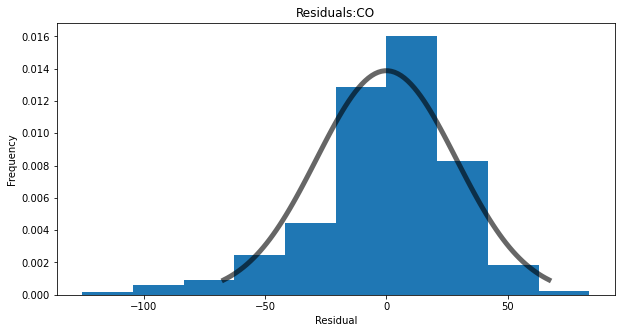

DE
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     288.8
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.45e-58
Time:                        19:36:39   Log-Likelihood:                -813.05
No. Observations:                 192   AIC:                             1632.
Df Residuals:                     189   BIC:                             1642.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2811.1357    131.428    -21.389      

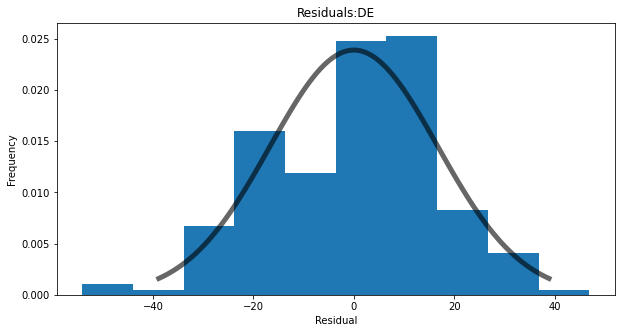

FL
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     920.0
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.23e-251
Time:                        19:36:39   Log-Likelihood:                -5413.0
No. Observations:                1334   AIC:                         1.083e+04
Df Residuals:                    1331   BIC:                         1.085e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2373.3436     56.991    -41.644      

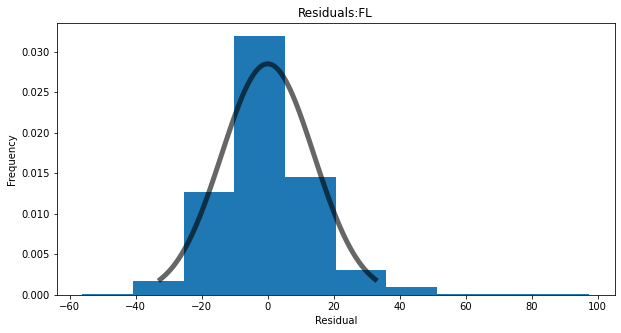

GA
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     7089.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:40   Log-Likelihood:                -32811.
No. Observations:                7283   AIC:                         6.563e+04
Df Residuals:                    7280   BIC:                         6.565e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3762.9039     32.352   -116.311      

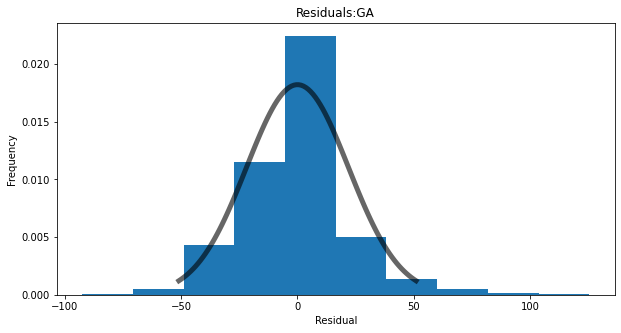

IA
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     9028.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:40   Log-Likelihood:                -28172.
No. Observations:                6336   AIC:                         5.635e+04
Df Residuals:                    6333   BIC:                         5.637e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3625.0554     28.028   -129.338      

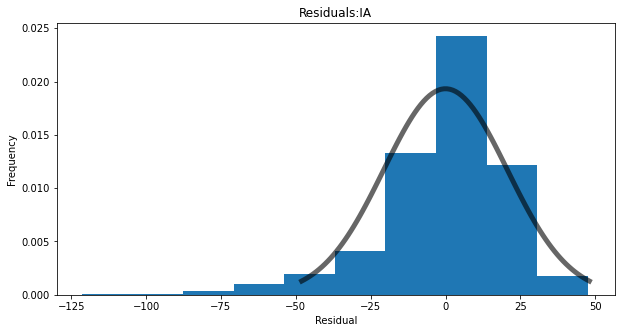

ID
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     869.6
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          3.07e-162
Time:                        19:36:41   Log-Likelihood:                -2027.7
No. Observations:                 495   AIC:                             4061.
Df Residuals:                     492   BIC:                             4074.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4947.3675    122.422    -40.412      

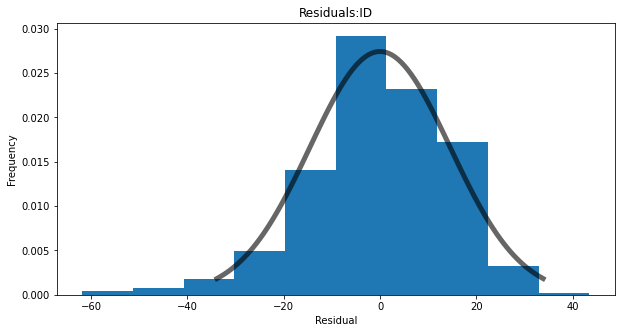

IL
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     5686.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:41   Log-Likelihood:                -29903.
No. Observations:                6489   AIC:                         5.981e+04
Df Residuals:                    6486   BIC:                         5.983e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3326.7768     32.584   -102.098      

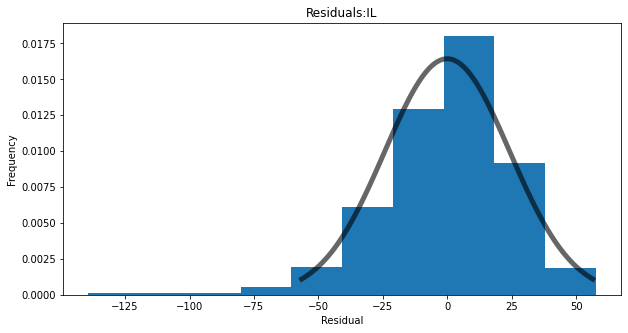

IN
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     7482.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:42   Log-Likelihood:                -25113.
No. Observations:                5744   AIC:                         5.023e+04
Df Residuals:                    5741   BIC:                         5.025e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3168.5340     27.655   -114.573      

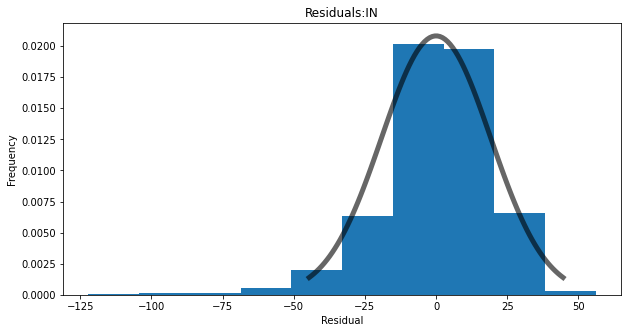

KS
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1500.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:43   Log-Likelihood:                -27782.
No. Observations:                5665   AIC:                         5.557e+04
Df Residuals:                    5662   BIC:                         5.559e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2683.4551     54.379    -49.347      

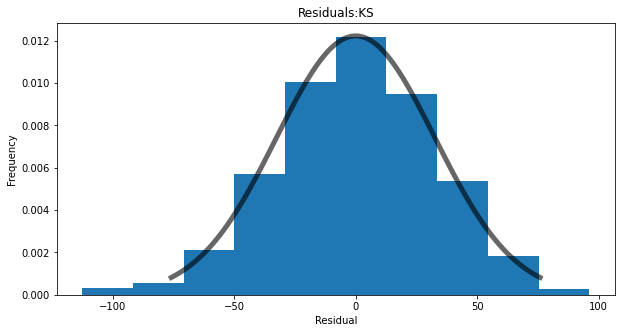

KY
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     8021.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:43   Log-Likelihood:                -30012.
No. Observations:                6954   AIC:                         6.003e+04
Df Residuals:                    6951   BIC:                         6.005e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2841.6348     24.020   -118.304      

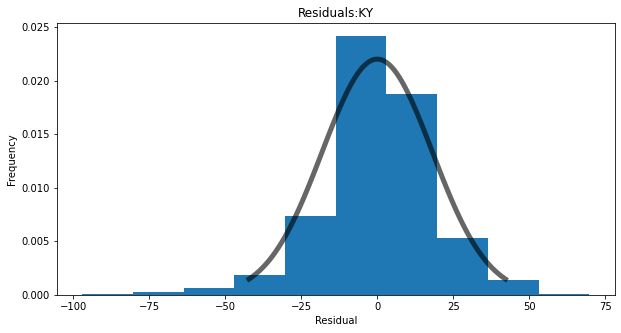

LA
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     3040.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:44   Log-Likelihood:                -8738.4
No. Observations:                1981   AIC:                         1.748e+04
Df Residuals:                    1978   BIC:                         1.750e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4716.4622     61.659    -76.492      

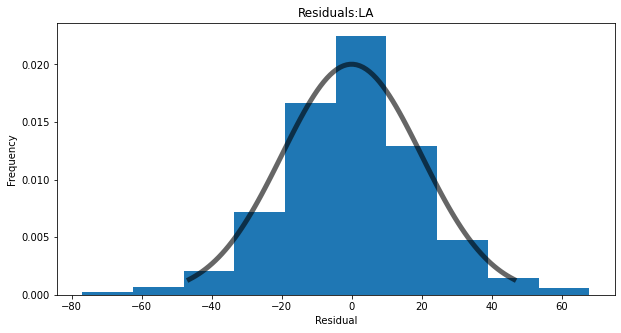

MD
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1395.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:44   Log-Likelihood:                -6358.1
No. Observations:                1450   AIC:                         1.272e+04
Df Residuals:                    1447   BIC:                         1.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2579.1742     55.320    -46.623      

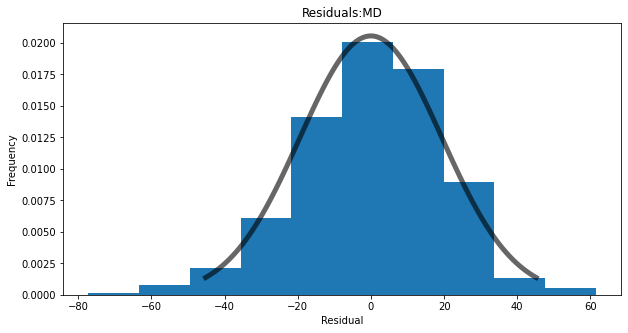

MI
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     6190.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:45   Log-Likelihood:                -17738.
No. Observations:                4194   AIC:                         3.548e+04
Df Residuals:                    4191   BIC:                         3.550e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2895.3305     28.141   -102.887      

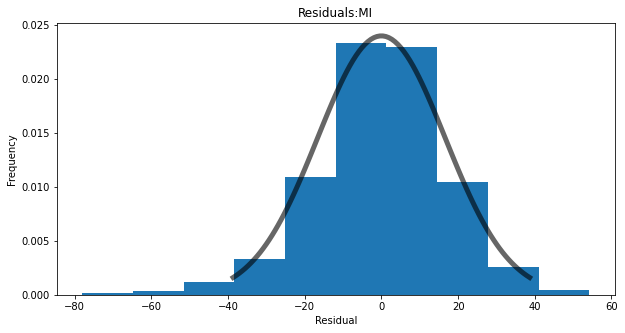

MN
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     6067.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:45   Log-Likelihood:                -22860.
No. Observations:                5011   AIC:                         4.573e+04
Df Residuals:                    5008   BIC:                         4.575e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3688.4006     35.577   -103.674      

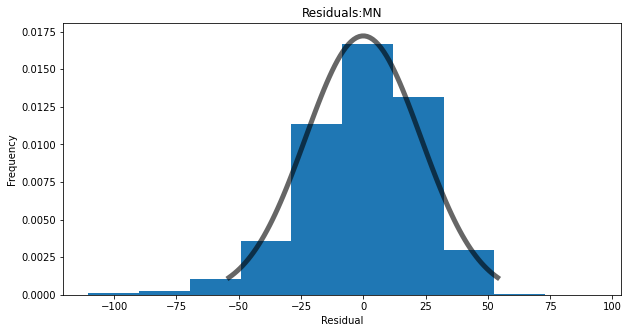

MO
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     4845.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:46   Log-Likelihood:                -28969.
No. Observations:                6391   AIC:                         5.794e+04
Df Residuals:                    6388   BIC:                         5.796e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2883.5050     30.892    -93.342      

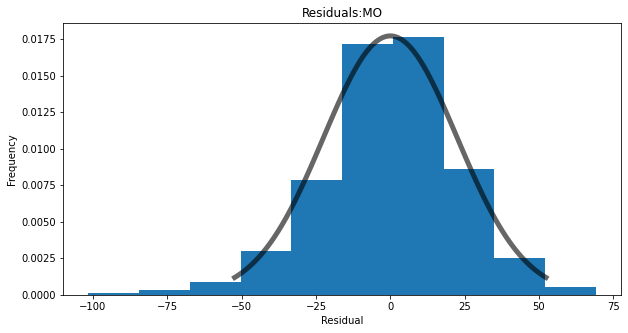

MS
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     7086.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:47   Log-Likelihood:                -16916.
No. Observations:                4007   AIC:                         3.384e+04
Df Residuals:                    4004   BIC:                         3.386e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3615.4794     30.948   -116.824      

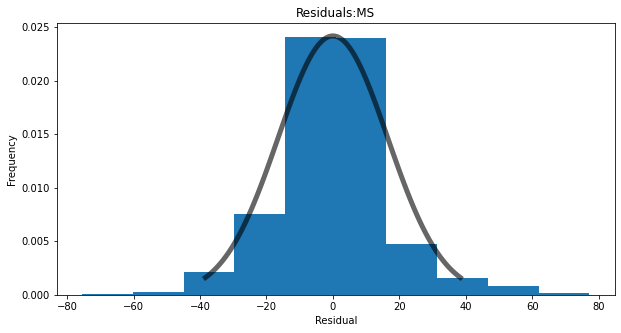

MT
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1579.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          7.99e-258
Time:                        19:36:47   Log-Likelihood:                -3029.8
No. Observations:                 691   AIC:                             6066.
Df Residuals:                     688   BIC:                             6079.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4259.2485     77.660    -54.845      

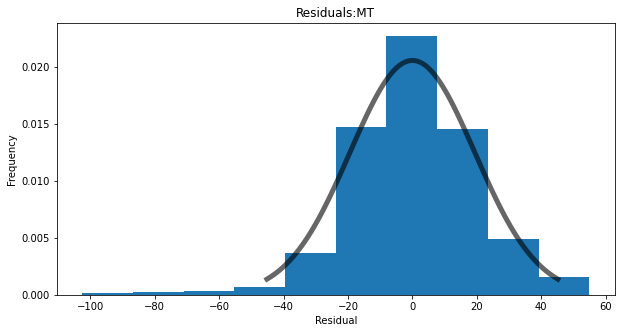

NC
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     3899.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:48   Log-Likelihood:                -25753.
No. Observations:                5881   AIC:                         5.151e+04
Df Residuals:                    5878   BIC:                         5.153e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2276.7586     27.792    -81.922      

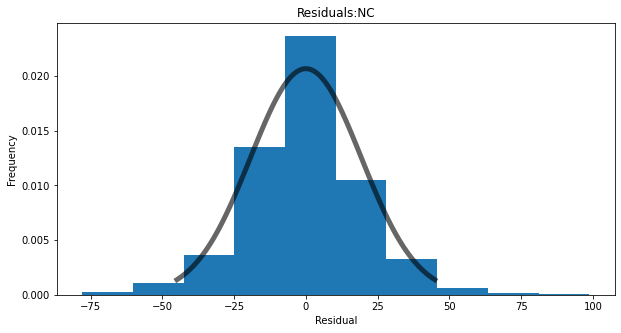

ND
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2962.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:48   Log-Likelihood:                -11758.
No. Observations:                2702   AIC:                         2.352e+04
Df Residuals:                    2699   BIC:                         2.354e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2781.4726     38.558    -72.138      

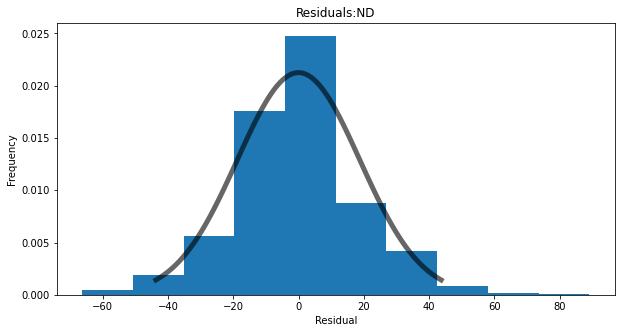

NE
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     9446.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:49   Log-Likelihood:                -26424.
No. Observations:                5834   AIC:                         5.285e+04
Df Residuals:                    5831   BIC:                         5.287e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4257.7912     31.735   -134.166      

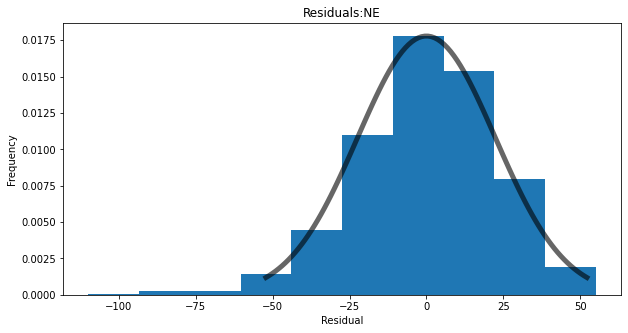

NJ
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     631.9
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          2.07e-174
Time:                        19:36:50   Log-Likelihood:                -4090.5
No. Observations:                 939   AIC:                             8187.
Df Residuals:                     936   BIC:                             8202.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2163.3876     73.102    -29.594      

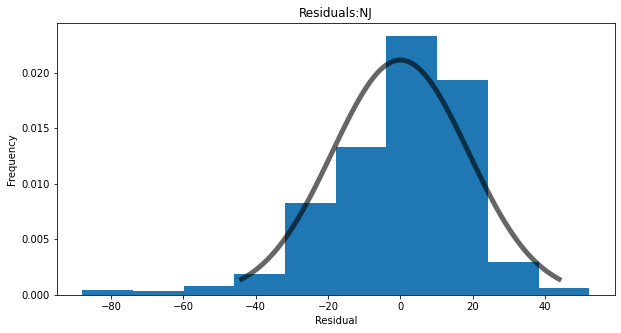

NM
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     762.6
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          8.89e-183
Time:                        19:36:50   Log-Likelihood:                -3670.7
No. Observations:                 767   AIC:                             7347.
Df Residuals:                     764   BIC:                             7361.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5704.2880    150.916    -37.798      

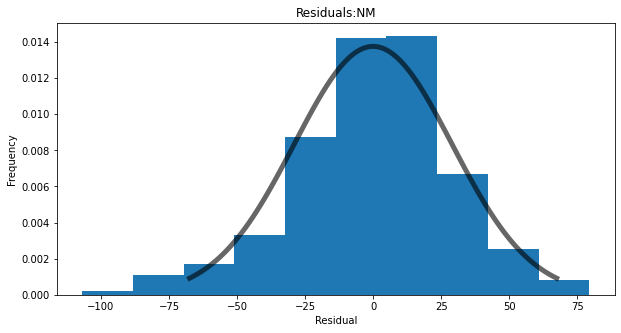

NY
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1288.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:51   Log-Likelihood:                -8331.6
No. Observations:                2068   AIC:                         1.667e+04
Df Residuals:                    2065   BIC:                         1.669e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2451.8075     50.319    -48.725      

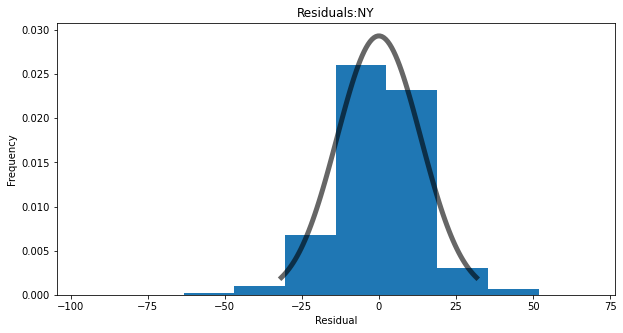

OH
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     7765.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:51   Log-Likelihood:                -23575.
No. Observations:                5502   AIC:                         4.716e+04
Df Residuals:                    5499   BIC:                         4.718e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3045.5657     26.006   -117.110      

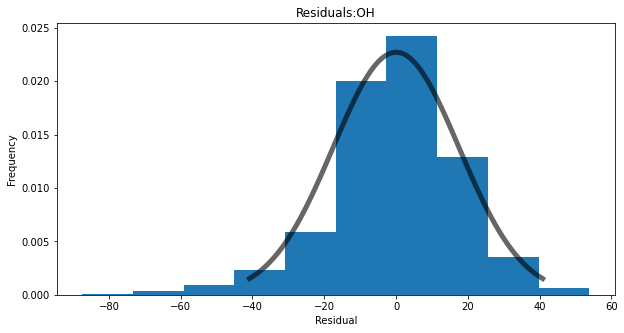

OK
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     2196.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:52   Log-Likelihood:                -12711.
No. Observations:                2777   AIC:                         2.543e+04
Df Residuals:                    2774   BIC:                         2.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3131.3837     48.105    -65.095      

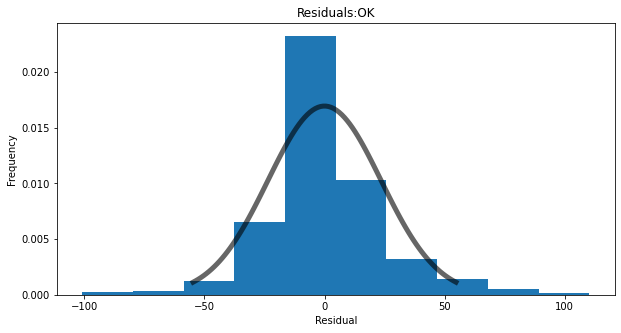

OR
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     206.0
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.65e-48
Time:                        19:36:53   Log-Likelihood:                -930.16
No. Observations:                 195   AIC:                             1866.
Df Residuals:                     192   BIC:                             1876.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5006.8564    259.128    -19.322      

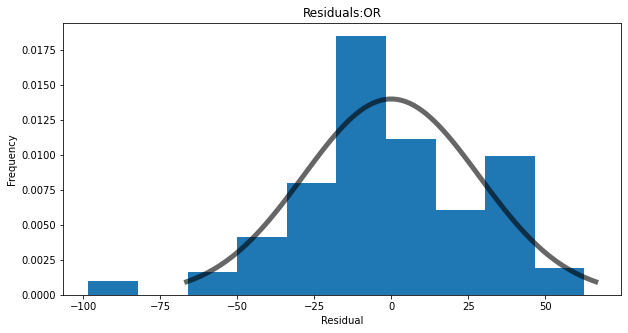

PA
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1611.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:53   Log-Likelihood:                -14719.
No. Observations:                3429   AIC:                         2.944e+04
Df Residuals:                    3426   BIC:                         2.946e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1942.4204     40.093    -48.448      

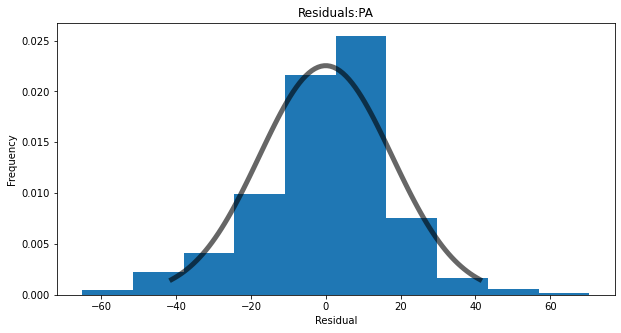

SC
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     2269.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:54   Log-Likelihood:                -11363.
No. Observations:                2653   AIC:                         2.273e+04
Df Residuals:                    2650   BIC:                         2.275e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2390.6389     37.943    -63.006      

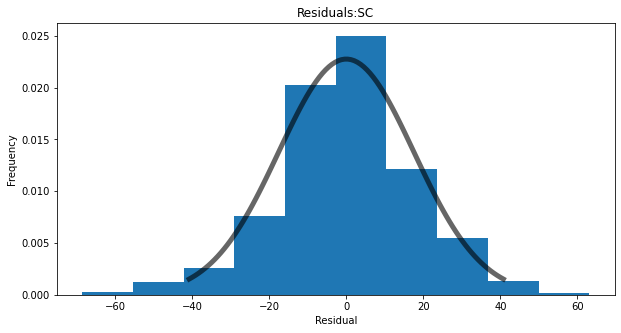

SD
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     3870.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:54   Log-Likelihood:                -18390.
No. Observations:                4073   AIC:                         3.679e+04
Df Residuals:                    4070   BIC:                         3.680e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2981.4896     37.928    -78.608      

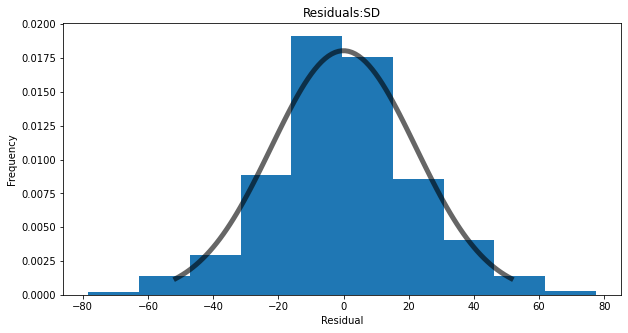

TN
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     5896.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:55   Log-Likelihood:                -21628.
No. Observations:                5080   AIC:                         4.326e+04
Df Residuals:                    5077   BIC:                         4.328e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2985.5565     29.052   -102.766      

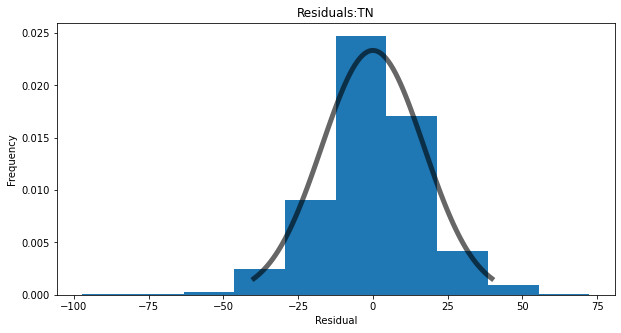

TX
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     514.5
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          7.48e-202
Time:                        19:36:56   Log-Likelihood:                -23040.
No. Observations:                4483   AIC:                         4.609e+04
Df Residuals:                    4480   BIC:                         4.611e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2401.0007     96.432    -24.898      

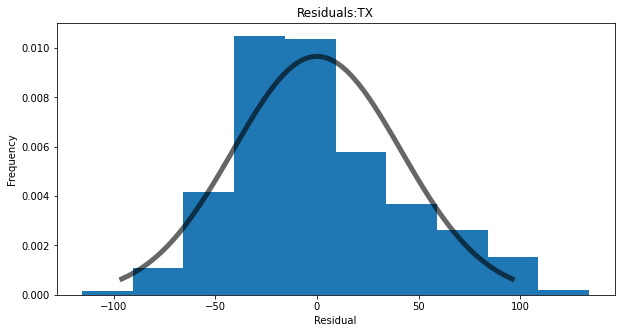

UT
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     397.8
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           4.05e-99
Time:                        19:36:56   Log-Likelihood:                -1852.9
No. Observations:                 440   AIC:                             3712.
Df Residuals:                     437   BIC:                             3724.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4009.7716    146.683    -27.336      

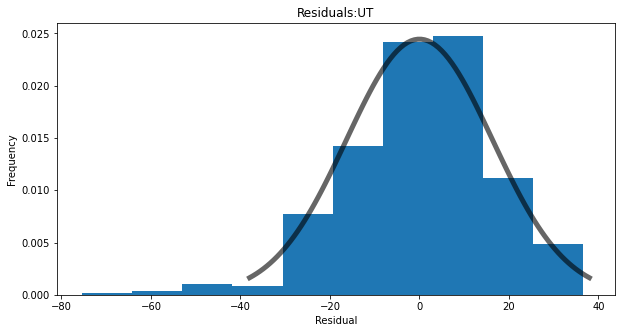

VA
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1824.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:57   Log-Likelihood:                -20589.
No. Observations:                4573   AIC:                         4.118e+04
Df Residuals:                    4570   BIC:                         4.120e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1998.1377     41.245    -48.446      

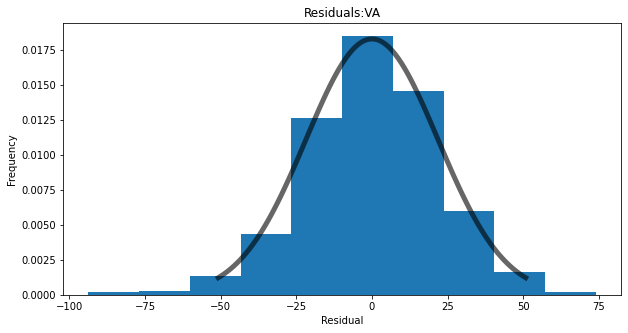

WA
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1677.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          2.77e-212
Time:                        19:36:57   Log-Likelihood:                -2008.0
No. Observations:                 464   AIC:                             4022.
Df Residuals:                     461   BIC:                             4034.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5498.8543    100.294    -54.827      

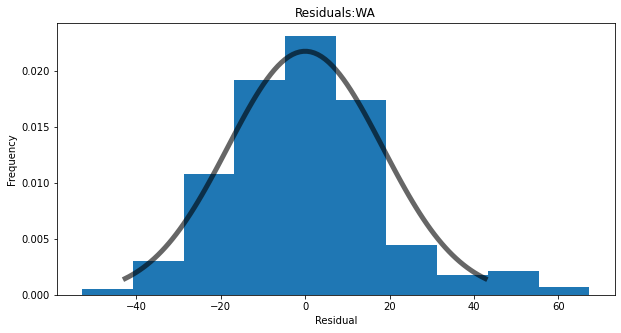

WI
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     5576.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:58   Log-Likelihood:                -17722.
No. Observations:                4167   AIC:                         3.545e+04
Df Residuals:                    4164   BIC:                         3.547e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2853.4471     28.487   -100.168      

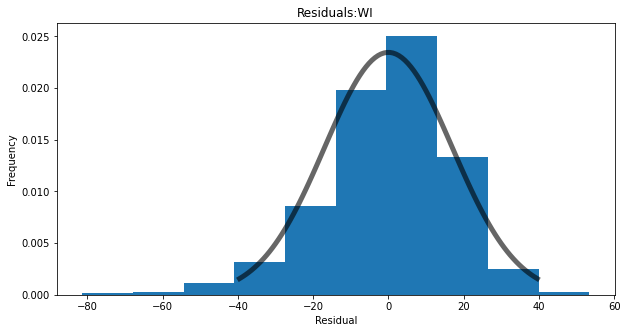

WV
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     2494.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:58   Log-Likelihood:                -7961.2
No. Observations:                1954   AIC:                         1.593e+04
Df Residuals:                    1951   BIC:                         1.595e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2793.9111     41.276    -67.688      

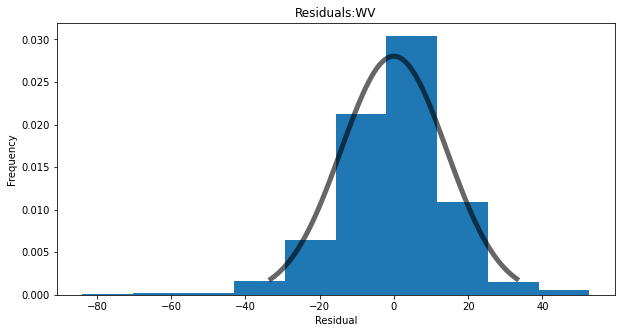

WY
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     986.1
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.26e-167
Time:                        19:36:59   Log-Likelihood:                -1893.7
No. Observations:                 466   AIC:                             3793.
Df Residuals:                     463   BIC:                             3806.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3505.2152     80.892    -43.332      

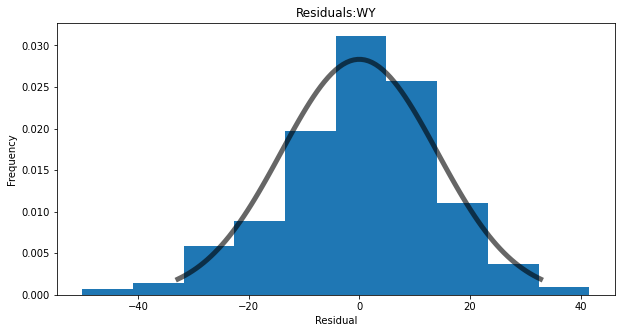

In [10]:
from scipy import stats

for group in states_df.groups.keys():
  df = states_df.get_group(group)
  x_a = df['year']
  x_b = df['total_prcp']
  y = df['yield']
  
  x2 = sm.add_constant(np.transpose([x_a,x_b]))

  mod_multi = sm.OLS(y,x2).fit()

  print(np.str(group))
  print(mod_multi.summary())
  
  y_pred_multi = mod_multi.fittedvalues


  fig, ax = plt.subplots(figsize=(10,5))
  ax.hist(y-y_pred_multi,density=True)
  ax.set_xlabel('Residual')
  ax.set_ylabel('Frequency')
  ax.set_title('Residuals:' + np.str(group))

  mu, std=stats.norm.fit(y-y_pred_multi)
  x_vals= np.linspace(stats.norm.ppf(0.01,mu,std),
                stats.norm.ppf(0.99,mu,std), 100)

  ax.plot(x_vals, stats.norm.pdf(x_vals,mu,std),
            'k-', lw=5, alpha=0.6, label='gaussian pdf')
  plt.show()

In [9]:
# multivariate model

# Single predictand 
y = ill_df['yield']

# Now two predictors!
x_a = ill_df['year']
x_b = ill_df['total_prcp']


x2 = sm.add_constant(np.transpose([x_a,x_b])) # necessary if we want regression equation to have intercept

mod_multi = sm.OLS(y,x2).fit()

print(mod_multi)
print(mod_multi.summary())

y_pred_multi = mod_multi.fittedvalues

print('R^2 = ',mod_multi.rsquared)

rmse_err_multi = mean_squared_error(y, y_pred_multi,squared=False)
print('RMSE = ',rmse_err_multi)

                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     5686.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:32:00   Log-Likelihood:                -29903.
No. Observations:                6489   AIC:                         5.981e+04
Df Residuals:                    6486   BIC:                         5.983e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3326.7768     32.584   -102.098      0.0

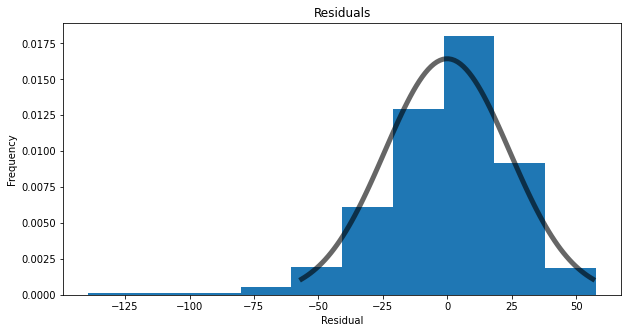

In [10]:
# Histogram of residuals! 
from scipy import stats

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(y-y_pred_multi,density=True)
ax.set_xlabel('Residual')
ax.set_ylabel('Frequency')
ax.set_title('Residuals')

mu, std=stats.norm.fit(y-y_pred_multi)
x_vals= np.linspace(stats.norm.ppf(0.01,mu,std),
               stats.norm.ppf(0.99,mu,std), 100)

ax.plot(x_vals, stats.norm.pdf(x_vals,mu,std),
          'k-', lw=5, alpha=0.6, label='gaussian pdf')
plt.show()

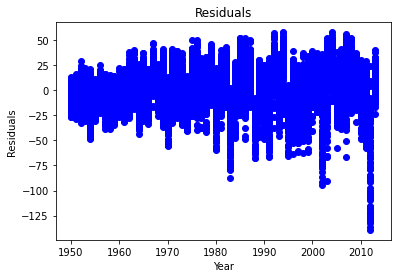

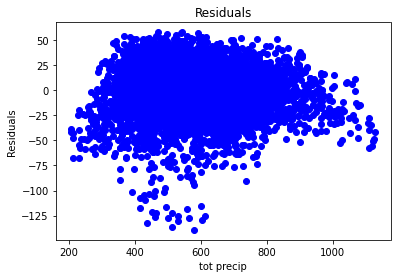

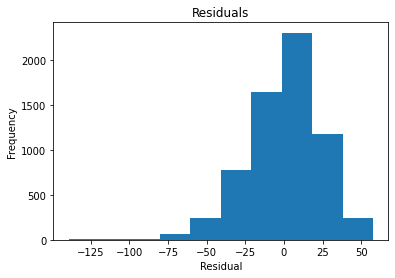

In [11]:
# Plot residuals - each predictor individually, yes?

# Residuals for flipper length
fig,ax=plt.subplots()
ax.scatter(x_a,y-y_pred_multi,color='b')
ax.set_xlabel('Year')
ax.set_ylabel('Residuals')
ax.set_title('Residuals')
plt.show()


# Residuals for bill length
fig,ax=plt.subplots()
ax.scatter(x_b,y-y_pred_multi,color='b')
ax.set_xlabel('tot precip')
ax.set_ylabel('Residuals')
ax.set_title('Residuals')
plt.show()


# Histogram for residuals
fig, ax = plt.subplots()
ax.hist(y-y_pred_multi)
ax.set_xlabel('Residual')
ax.set_ylabel('Frequency')
ax.set_title('Residuals')
plt.show()

In [31]:
states_df['total_prcp'].boxplot()

AttributeError: ignored

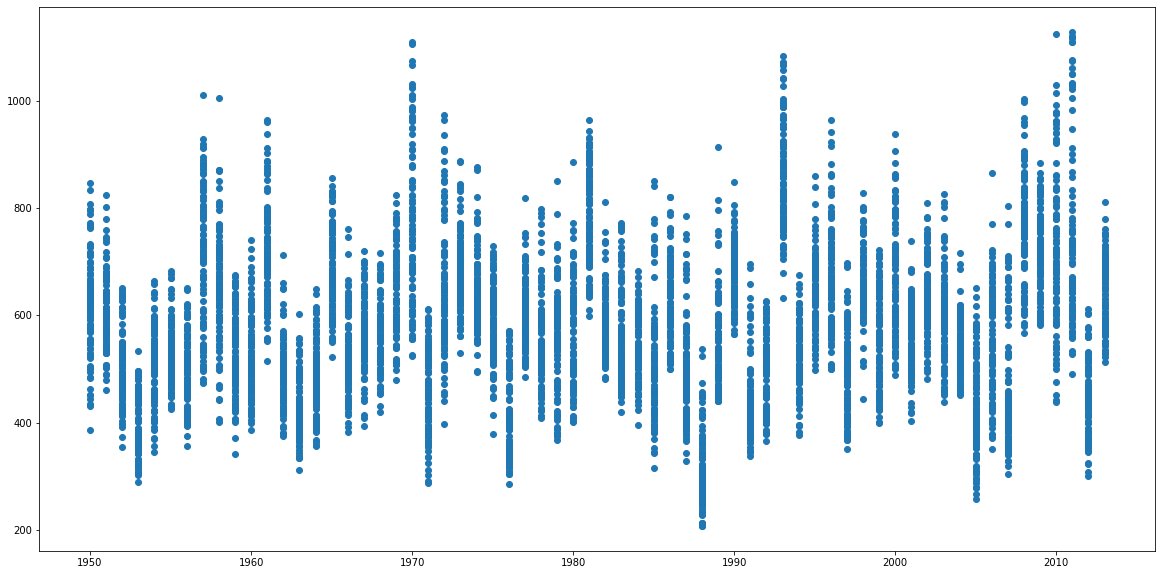

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(x_a, x_b)

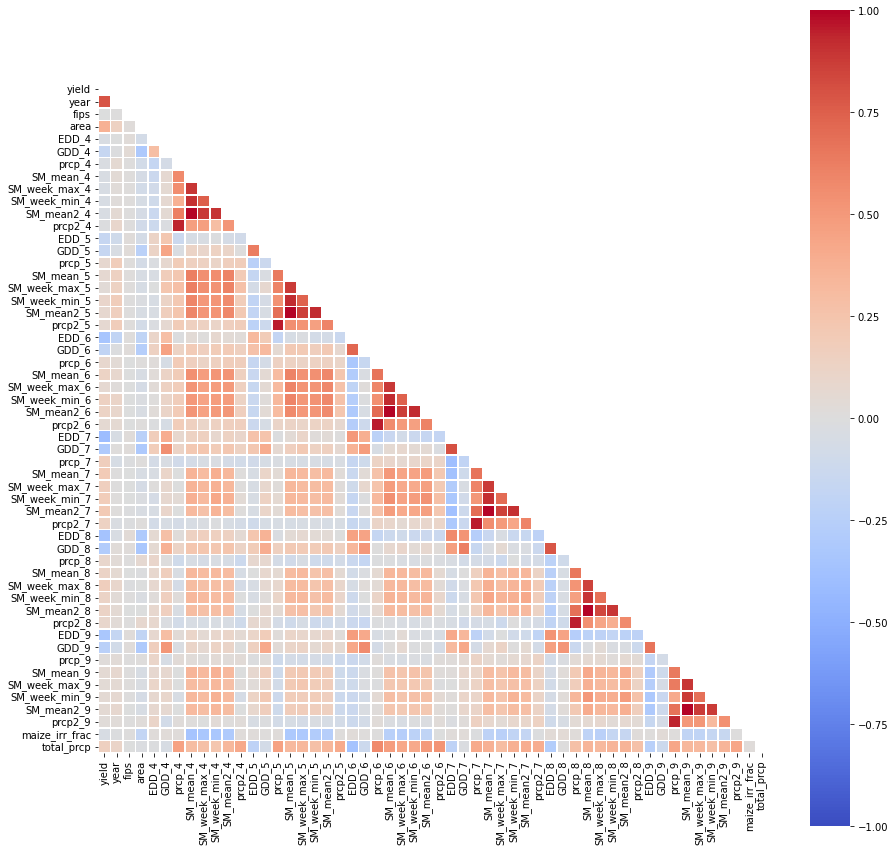

In [12]:
ill_corr = ill_df.corr()
mask = np.triu(np.ones_like(ill_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(15,15))

cmap = 'coolwarm'

sb.heatmap(ill_corr,mask=mask, annot=False, fmt='.2f', cmap=cmap, vmin=-1, vmax=1, square=True, linewidth=.7)

In [ ]:
# fmap = folium.Map(location=[38, -102], zoom_start=4)


# folium.Choropleth(
#                   geo_data=final_df,
#                   data=final_df,
#                   columns=['state',"prcp_9"],
#                   key_on="feature.properties.state",
#                   fill_color='YlGnBu',
#                   fill_opacity=1,
#                   line_opacity=0.2,
#                   legend_name="prcp_9",
#                   smooth_factor=0,
#                   Highlight= True,
#                   line_color = "#0000",
#                   name = "Wills",
#                   show=False,
#                   overlay=True,
#                   nan_fill_color = "White"
#                   ).add_to(fmap)



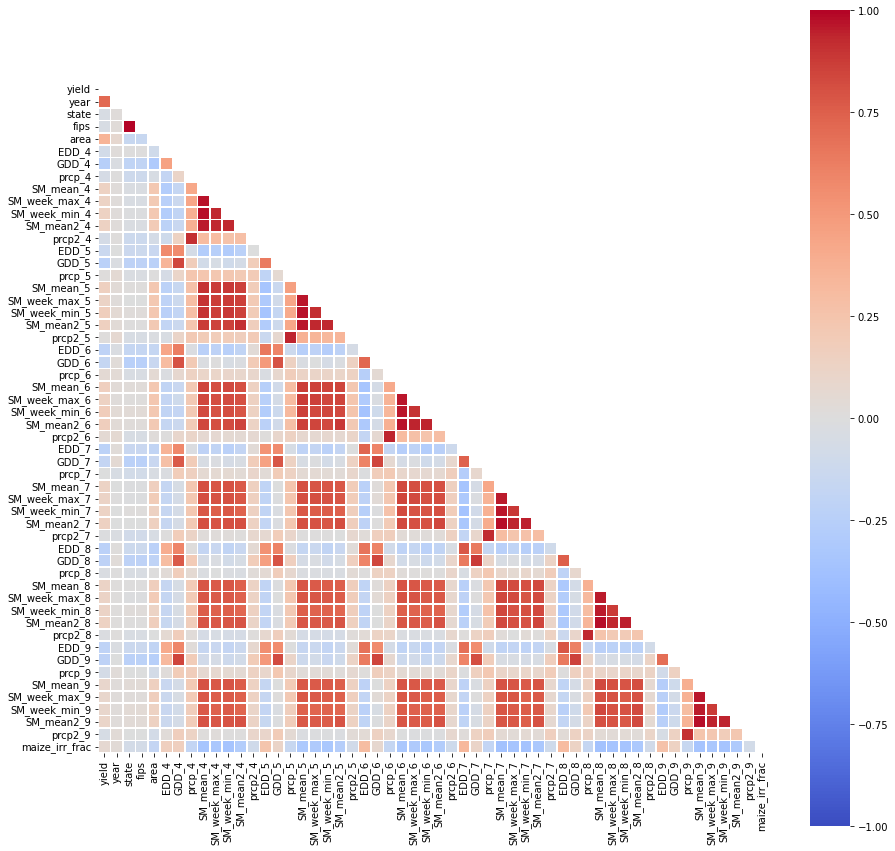

In [ ]:
ds_corr = ds.corr()

mask = np.triu(np.ones_like(ds_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(15,15))

cmap = 'coolwarm'

sb.heatmap(ds_corr,mask=mask, annot=False, fmt='.2f', cmap=cmap, vmin=-1, vmax=1, square=True, linewidth=.7)